## Observations and Insights 

In [5]:
# Dependencies and Setup
%matplotlib inline 
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")
merged_df
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
merged_df = merged_df.dropna(how='any')
merged_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint

merged_df[["Mouse ID","Timepoint" ]].duplicated()

# drop =merged_df["Timepoint"].drop_duplicates().reset_index(drop=True)

list = []
duplicate = merged_df[["Mouse ID","Timepoint" ]].duplicated(keep=False)
duplicate

# for x in duplicate:
#     if x == True:
#         list.append()



0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 



In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [10]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Combining results of multiple groupby functions into a new DataFrame.
# merged_df.groupby('Mouse ID')['Drug Regimen'].nunique().plot(kind='bar')
# print(merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].describe())
# SE = merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()
# print(f"Standard Error: \n  {SE}")
# SE.columns['regimen', 'std error']

# stats = pd.DataFrame(...)


In [12]:
# SEM of tumor volume for each type of regimen-----# Using a single groupby with agg operator once.
stats_per_reg = merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].agg([ "mean", "median", "var", "std", "sem"])

stats_per_reg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
merged_df.groupby(['Drug Regimen']).nunique()


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,25,2,15,9,10,206,4
Ceftamin,25,2,15,6,10,154,5
Infubinol,25,2,15,7,10,154,5
Ketapril,25,2,15,6,10,164,5
Naftisol,25,2,14,6,10,162,5
Placebo,25,2,18,6,10,157,5
Propriva,25,2,14,6,10,136,5
Ramicane,25,2,15,9,10,204,4
Stelasyn,24,2,14,6,10,158,5


## Bar and Pie Charts

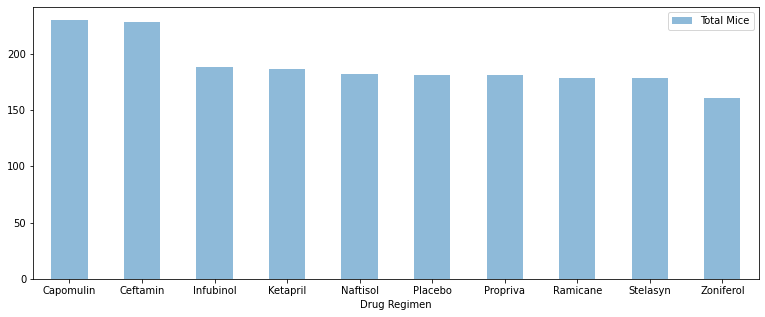

In [14]:
# total number of mice for each treatment
mice_per_regimen = merged_df["Drug Regimen"].value_counts()
df2  = mice_per_regimen.copy() 
# barplot = merged_df.plot.bar(x='Drug Regimen', y='total number of mice', rot=0)

# plt.bar(x_axis, merged_df["Drug Regimen"], color='r', alpha=0.5, align="center")
# mice_per_regimen.iloc[0:5]

# df2 = pd.DataFrame({"Total Mice":df2})
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', "Ketapril", 'Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
df = pd.DataFrame({'Drug Regimen':drugs, 'Total Mice':df2[0:]})
ax = df.plot.bar(x='Drug Regimen', y='Total Mice', rot=0, figsize=(13,5), alpha=0.5)

Text(24.0, 0.5, 'Total Mice')

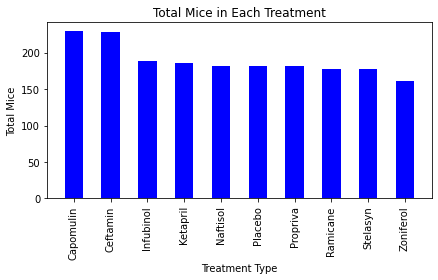

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(df2[0:]))
plt.bar(x_axis, df2[0:] , width = 0.5, color="b", align="center")
plt.title("Total Mice in Each Treatment")
plt.xlabel("Treatment Type")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.ylabel("Total Mice")





In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_groups = merged_df.groupby('Sex')
gender_groups.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [18]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
